In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Arial"

In [2]:
datapath = '../../DataTables/STModel.csv'
params = pd.read_csv(datapath)

# Figures

In [3]:
nparams = 5;
keys = params.keys()
keys

Index(['sub', 'group', 'amp', 'scenter', 'swidth', 'tcenter', 'twidth',
       'xpeak', 'ypeak', 'distance'],
      dtype='object')

In [4]:
colorpalette=['#55a868','#8172b3']
onset = [15, 0.15]
stimonset = [30, 0]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior m

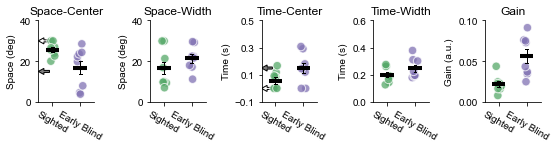

In [5]:
f, axs = plt.subplots(1,nparams)
f.set_size_inches(9, 1.5)
plt.subplots_adjust(wspace=1., hspace=1)
plt.rcParams['font.family'] = "Arial"

titles = ['Gain', 'Space-Center', 'Space-Width', 'Time-Center', 'Time-Width']

pltidx = 0

for idx in [1,2,3,4,0]:

    thiskey = keys[idx+2]    
    
    plt.subplot(1,nparams,pltidx+1)
    if idx == 3:
        plt.arrow(x=-0.1, y=onset[1], dx=-0.2, dy=0, width=.015, head_length=0.2, facecolor='gray')
        plt.arrow(x=-0.1, y=stimonset[1], dx=-0.2, dy=0, width=.015, head_length=0.2, facecolor='white')
    elif idx == 1:
        plt.arrow(x=-0.1, y=onset[0], dx=-0.2, dy=0, width=1, head_length=0.2, facecolor='gray')
        plt.arrow(x=-0.1, y=stimonset[0], dx=-0.2, dy=0, width=1, head_length=0.2, facecolor='white')

    sns.stripplot(x="group", y=thiskey, data=params, ax=axs[pltidx], order=["SC","EB"], alpha=.75, palette=colorpalette,
             edgecolor='white', linewidth=1, size=8.5, marker='o', zorder=1)
    sns.pointplot(x="group", y=thiskey, data=params, ax=axs[pltidx], order=["SC","EB"], ci=68, 
                 color="0", join=False, scale=2, markers='_', errwidth=1, capsize=0.1)
    axs[pltidx].set(ylabel=None)
    axs[pltidx].set(xlabel=None)
    
    plt.xlabel('');
    plt.xticks([0, 1], ['Sighted', 'Early Blind'], rotation=-30, fontsize=10)
    plt.title(titles[idx])
    
    if idx == 3: # time - center
        plt.yticks([-0.1, 0.1, 0.3, 0.5])
        plt.ylabel('Time (s)');
    elif idx == 1: # space - center
        plt.yticks([0, 20, 40])
        plt.ylabel('Space (deg)');
    elif idx == 2: # space - width
        plt.yticks([0, 20, 40])
        plt.ylabel('Space (deg)');
    elif idx == 4: # time - width
        plt.yticks([0, 0.2, 0.4, 0.6])
        plt.ylabel('Time (s)');
    elif idx == 0: # amp
        plt.yticks([0, 0.05, 0.1])
        plt.ylabel('Gain (a.u.)')

    sns.despine()
    
    pltidx = pltidx + 1


# Stats

In [6]:
results = [None] * nparams
for idx in range(nparams):
    thiskey = keys[idx+2]
    x = params.loc[params["group"]=="EB"][thiskey]
    y = params.loc[params["group"]=="SC"][thiskey]
    results[idx] = pg.ttest(x,y)

In [7]:
results[0]

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.724693,14,two-sided,0.002264,"[0.01, 0.06]",1.862346,15.586,0.933086


In [8]:
results[1]

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.400057,14,two-sided,0.030866,"[-16.73, -0.94]",1.200029,2.4,0.607839


In [9]:
results[2]

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.185069,14,two-sided,0.255717,"[-3.79, 13.17]",0.592534,0.68,0.197366


In [10]:
results[3]

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.927373,14,two-sided,0.074473,"[-0.01, 0.19]",0.963687,1.366,0.434595


In [11]:
results[4]

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.388794,14,two-sided,0.186594,"[-0.03, 0.12]",0.694397,0.802,0.253456
